In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rc,rcParams
rc('font', weight='bold')
sns.set_palette(['steelblue', 'orange', 'indianred', 'seagreen'])

In [14]:
# define the ODEs nucleated polymerization model (NPM)
def npm(var, t, lamb, d, b, beta, a, n):
    x = var[0]
    y = var[1]
    z = var[2]
    dxdt = lamb - d*x - beta*x*y + n*(n-1)*b*y
    dydt = -a*y + b*z - (2*n - 1)*b*y
    dzdt = beta*x*y - a*z - n*(n-1)*b*y
    
    return [dxdt, dydt, dzdt]

In [15]:
# define paramters for the NPM and use odeint to numerically solve ODEs

lamb = 2000
d = 4
beta = 0.015
b = 0.0009
a = 0.05
n = 6
var = [482.5, 10, 500]
t = np.linspace(0, 500, 1000)

output = odeint(npm, var, t, args=(lamb, d, b, beta, a, n))
x = output[:,0]
y = output[:,1]
z = output[:,2]

In [16]:
# Function helps determine line plot style
def pub_line_plot(axis, x, y, tick_width, tick_size, line_width, linestyle=None, color=None):

    axis.plot(x, y, linewidth = line_width, color=color, linestyle=linestyle)


    for axes in ['bottom', 'left']:
        axis.spines[axes].set_linewidth(2.5)
        axis.spines[axes].set_color('0.2')

    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.tick_params(width = tick_width, color = '0.2', labelsize=tick_size, labelcolor='0.2')

    axis.set_xlabel(axis.get_xlabel(), fontsize = 14, weight = 'bold', color = '0.2')
    axis.set_ylabel(axis.get_ylabel(), fontsize = 14, weight = 'bold', color = '0.2')

In [17]:
# Override Function helps determine line plot style, with labels
def pub_line_plot(axis, x, y, tick_width, tick_size, line_width, color=None, label=None, linestyle=None):

    axis.plot(x, y, linewidth = line_width, color=color, label=label, linestyle=linestyle)


    for axes in ['bottom', 'left']:
        axis.spines[axes].set_linewidth(2.5)
        axis.spines[axes].set_color('0.2')

    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.tick_params(width = tick_width, color = '0.2', labelsize=tick_size, labelcolor='0.2')

    axis.set_xlabel(axis.get_xlabel(), fontsize = 14, weight = 'bold', color = '0.2')
    axis.set_ylabel(axis.get_ylabel(), fontsize = 14, weight = 'bold', color = '0.2')

In [18]:
# Function helps determine scatter plot style
def pub_scatter_plot(axis, x, y, tick_width, tick_size, line_width, color=None, label=None, linestyle=None):

    axis.scatter(x, y, linewidth = line_width, color=color, label=label)


    for axes in ['bottom', 'left']:
        axis.spines[axes].set_linewidth(2.5)
        axis.spines[axes].set_color('0.2')

    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.tick_params(width = tick_width, color = '0.2', labelsize=tick_size, labelcolor='0.2')

    axis.set_xlabel(axis.get_xlabel(), fontsize = 14, weight = 'bold', color = '0.2')
    axis.set_ylabel(axis.get_ylabel(), fontsize = 14, weight = 'bold', color = '0.2')

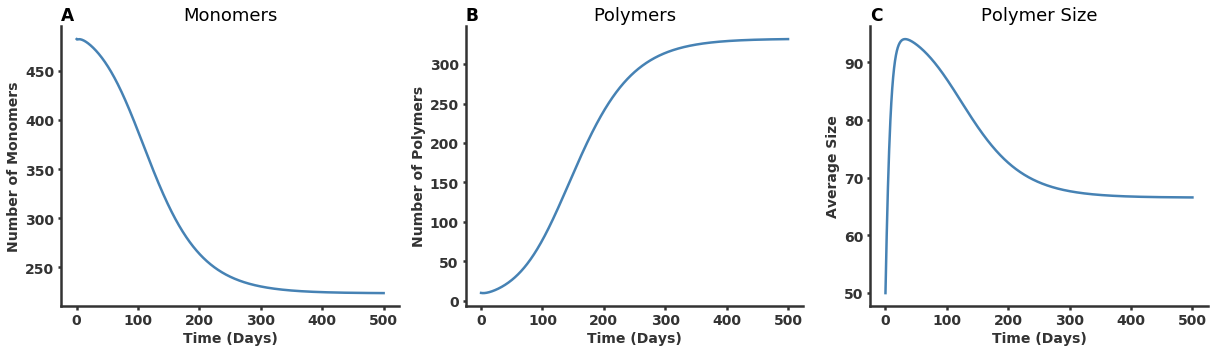

In [19]:
# Figure 1.2, dynamics of NPM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (17, 5))

pub_line_plot(ax[0], t, x, 2.5, 14, 2.5, color='steelblue')

ax[0].set_title('A', loc='left', fontweight="bold", pad=10, size=17)
ax[0].set_title('Monomers', size=18)
ax[0].set_xlabel('Time (Days)')
ax[0].set_ylabel('Number of Monomers')
#ax[0].set_xticklabels(fontsize=14, weight='bold')

pub_line_plot(ax[1], t, y, 2.5, 14, 2.5, color='steelblue')
    
    
ax[1].set_title('B', loc='left', fontweight="bold", pad=10, size=17)
ax[1].set_title('Polymers', size=18)
ax[1].set_xlabel('Time (Days)')
ax[1].set_ylabel('Number of Polymers')
pub_line_plot(ax[2], t, z/y, 2.5, 14, 2.5, color='steelblue')
ax[2].set_title('C', loc='left', fontweight="bold", pad=10, size=17)
ax[2].set_title('Polymer Size', size=18)
ax[2].set_xlabel('Time (Days)')
ax[2].set_ylabel('Average Size')
sns.despine()

fig.tight_layout()
fig.savefig('npm_ode.pdf', dpi=200)

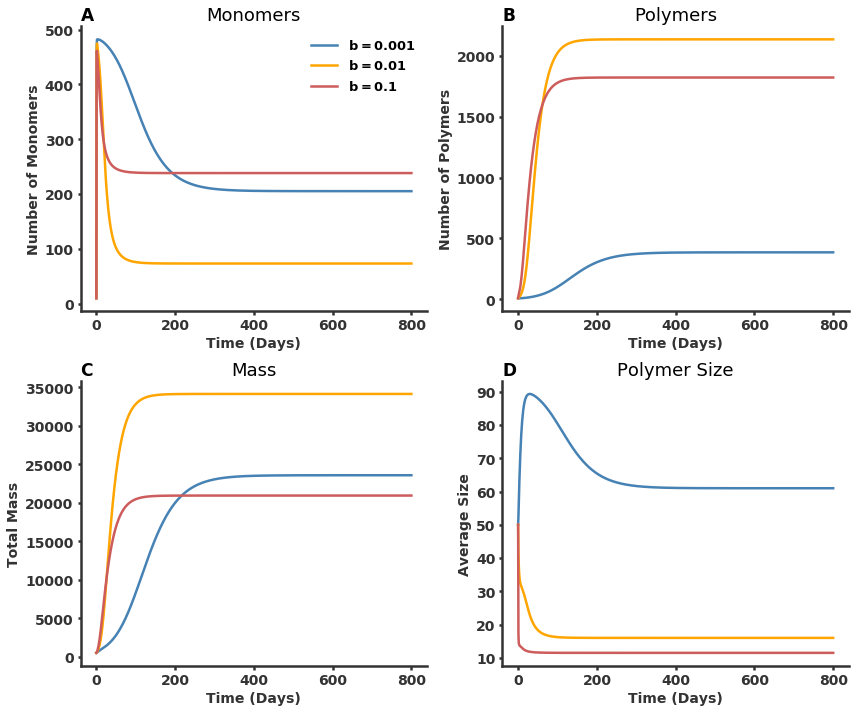

In [20]:
# Figure 1.3, dynamics of NPM under varying fragmentation rates
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))

lamb = 2000
d = 4
beta = 0.015
b = 0.001
a = 0.05
n = 6
var = [10, 10, 500]
t = np.linspace(0, 800, 1000)

output = odeint(npm, var, t, args=(lamb, d, b, beta, a, n))
x_0001 = output[:,0]
y_0001 = output[:,1]
z_0001 = output[:,2]

output = odeint(npm, var, t, args=(lamb, d, 0.01, beta, a, n))
x_001 = output[:,0]
y_001 = output[:,1]
z_001 = output[:,2]

output = odeint(npm, var, t, args=(lamb, d, 0.1, beta, a, n))
x_01 = output[:,0]
y_01 = output[:,1]
z_01 = output[:,2]

pub_line_plot(ax[0, 0], t, x_0001, 2.5, 14, 2.5, label=r'$\mathregular{b} = 0.001$')


pub_line_plot(ax[0, 0], t, x_001, 2.5, 14, 2.5, color='orange', label=r'$\mathregular{b} = 0.01$')


pub_line_plot(ax[0, 0], t, x_01, 2.5, 14, 2.5, color='indianred', label=r'$\mathregular{b} = 0.1$')


ax[0, 0].legend(loc='upper right', frameon=False, prop={'size': 13})
ax[0, 0].set_title('A', loc='left', fontweight="bold", pad=10, size=17)
ax[0, 0].set_title('Monomers', size=18)
ax[0, 0].set_xlabel('Time (Days)')
ax[0, 0].set_ylabel('Number of Monomers')

pub_line_plot(ax[0, 1], t, y_0001, 2.5, 14, 2.5, color='steelblue')


pub_line_plot(ax[0, 1], t, y_001, 2.5, 14, 2.5, color='orange')


pub_line_plot(ax[0, 1], t, y_01, 2.5, 14, 2.5, color='indianred')


ax[0, 1].set_title('B', loc='left', fontweight="bold", pad=10, size=17)
ax[0, 1].set_title('Polymers', size=18)
ax[0, 1].set_xlabel('Time (Days)')
ax[0, 1].set_ylabel('Number of Polymers')


pub_line_plot(ax[1, 0], t, z_0001, 2.5, 14, 2.5, color='steelblue')


pub_line_plot(ax[1, 0], t, z_001, 2.5, 14, 2.5, color='orange')


pub_line_plot(ax[1, 0], t, z_01, 2.5, 14, 2.5, color='indianred')


ax[1, 0].set_title('C', loc='left', fontweight="bold", pad=10, size=17)
ax[1, 0].set_title('Mass', size=18)
ax[1, 0].set_xlabel('Time (Days)')
ax[1, 0].set_ylabel('Total Mass')

pub_line_plot(ax[1, 1], t, z_0001 / y_0001, 2.5, 14, 2.5, color='steelblue')


pub_line_plot(ax[1, 1], t, z_001 / y_001, 2.5, 14, 2.5, color='orange')


pub_line_plot(ax[1, 1], t, z_01 / y_01, 2.5, 14, 2.5, color='indianred')


ax[1, 1].set_title('D', loc='left', fontweight="bold", pad=10, size=17)
ax[1, 1].set_title('Polymer Size', size=18)
ax[1, 1].set_xlabel('Time (Days)')
ax[1, 1].set_ylabel('Average Size')


sns.despine()

fig.tight_layout()
fig.savefig('npm_b_dynamics.pdf', dpi=200)

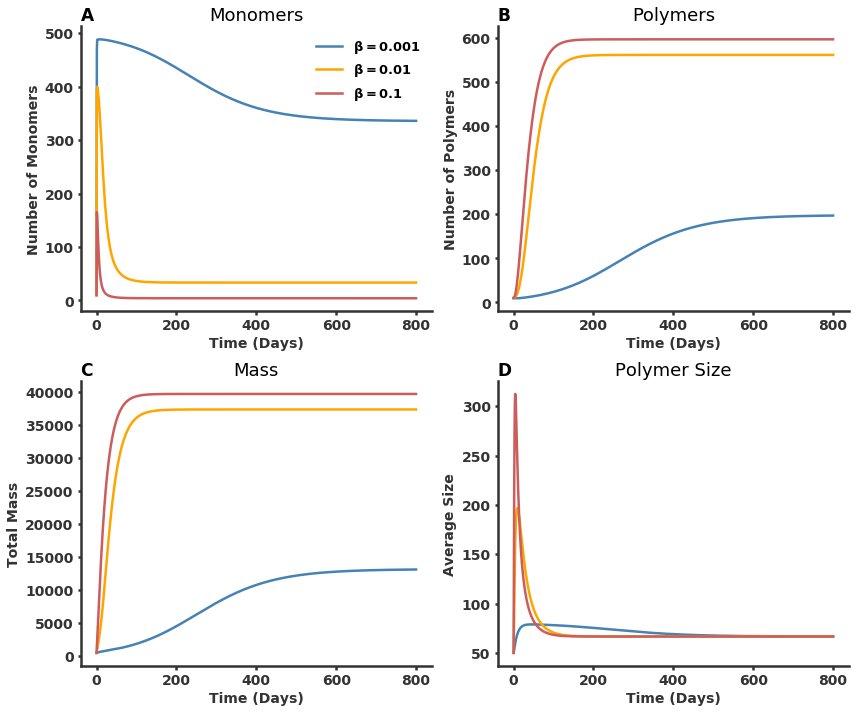

In [21]:
# Figure 1.4, dynamics of NPM under varying polymerization rates
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))

lamb = 2000
d = 4
beta = 0.015
b = 0.0009
a = 0.05
n = 6
var = [10, 10, 500]
t = np.linspace(0, 800, 1000)

output = odeint(npm, var, t, args=(lamb, d, b, 0.01, a, n))
x_0001 = output[:,0]
y_0001 = output[:,1]
z_0001 = output[:,2]

output = odeint(npm, var, t, args=(lamb, d, b, 0.1, a, n))
x_001 = output[:,0]
y_001 = output[:,1]
z_001 = output[:,2]

output = odeint(npm, var, t, args=(lamb, d, b, 0.8, a, n))
x_01 = output[:,0]
y_01 = output[:,1]
z_01 = output[:,2]

pub_line_plot(ax[0, 0], t, x_0001, 2.5, 14, 2.5, label=r'$\mathregular{\beta} = 0.001$')


pub_line_plot(ax[0, 0], t, x_001, 2.5, 14, 2.5, color='orange', label=r'$\mathregular{\beta} = 0.01$')

pub_line_plot(ax[0, 0], t, x_01, 2.5, 14, 2.5, color='indianred', label=r'$\mathregular{\beta} = 0.1$')


ax[0, 0].legend(loc='upper right', frameon=False, prop={'size': 13})
ax[0, 0].set_title('A', loc='left', fontweight="bold", pad=10, size=17)
ax[0, 0].set_title('Monomers', size=18)
ax[0, 0].set_xlabel('Time (Days)')
ax[0, 0].set_ylabel('Number of Monomers')

pub_line_plot(ax[0, 1], t, y_0001, 2.5, 14, 2.5, color='steelblue')


pub_line_plot(ax[0, 1], t, y_001, 2.5, 14, 2.5, color='orange')

pub_line_plot(ax[0, 1], t, y_01, 2.5, 14, 2.5, color='indianred')


ax[0, 1].set_title('B', loc='left', fontweight="bold", pad=10, size=17)
ax[0, 1].set_title('Polymers', size=18)
ax[0, 1].set_xlabel('Time (Days)')
ax[0, 1].set_ylabel('Number of Polymers')


pub_line_plot(ax[1, 0], t, z_0001, 2.5, 14, 2.5, color='steelblue')


pub_line_plot(ax[1, 0], t, z_001, 2.5, 14, 2.5, color='orange')


pub_line_plot(ax[1, 0], t, z_01, 2.5, 14, 2.5, color='indianred')


ax[1, 0].set_title('C', loc='left', fontweight="bold", pad=10, size=17)
ax[1, 0].set_title('Mass', size=18)
ax[1, 0].set_xlabel('Time (Days)')
ax[1, 0].set_ylabel('Total Mass')

pub_line_plot(ax[1, 1], t, z_0001 / y_0001, 2.5, 14, 2.5, color='steelblue')


pub_line_plot(ax[1, 1], t, z_001 / y_001, 2.5, 14, 2.5, color='orange')


pub_line_plot(ax[1, 1], t, z_01 / y_01, 2.5, 14, 2.5, color='indianred')

ax[1, 1].set_title('D', loc='left', fontweight="bold", pad=10, size=17)
ax[1, 1].set_title('Polymer Size', size=18)
ax[1, 1].set_xlabel('Time (Days)')
ax[1, 1].set_ylabel('Average Size')


sns.despine()

fig.tight_layout()
fig.savefig('npm_beta_dynamics.pdf', dpi=200)

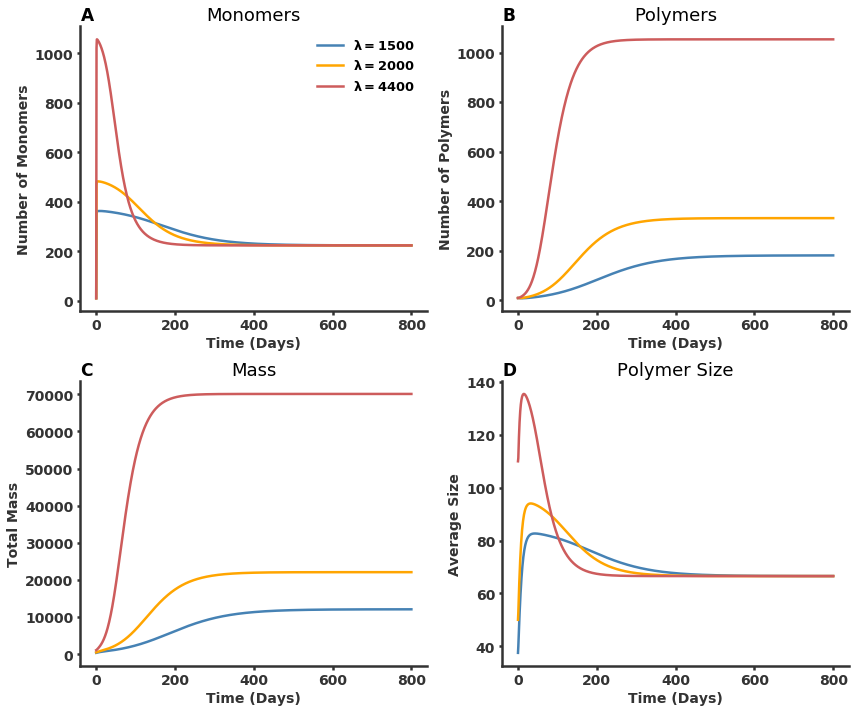

In [20]:
# Figure 1.5, dynamics of NPM under varying rates of monomer production
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))

lamb = 2000
d = 4
beta = 0.015
b = 0.0009
a = 0.05
n = 6
var = [10, 10, 375]
t = np.linspace(0, 800, 1000)

output = odeint(npm, var, t, args=(1500, d, b, beta, a, n))
x_0001 = output[:,0]
y_0001 = output[:,1]
z_0001 = output[:,2]

var = [10, 10, 500]

output = odeint(npm, var, t, args=(2000, d, b, beta, a, n))
x_001 = output[:,0]
y_001 = output[:,1]
z_001 = output[:,2]

var = [10, 10, 1100]

output = odeint(npm, var, t, args=(4400, d, b, beta, a, n))
x_01 = output[:,0]
y_01 = output[:,1]
z_01 = output[:,2]

#skip_elements(arr, index, skip_n_start, skip_n_end)
pub_line_plot(ax[0, 0], t, x_0001, 2.5, 14, 2.5, label=r'$\mathregular{\lambda} = 1500$')
#pub_scatter_plot(ax[0, 0], skip_elements(time_0001, 0, 1, 500), skip_elements(monomer_cts_0001, 0, 1, 500), 2.5, 14, 2.5, color='steelblue')

pub_line_plot(ax[0, 0], t, x_001, 2.5, 14, 2.5, color='orange', label=r'$\mathregular{\lambda} = 2000$')
#pub_scatter_plot(ax[0, 0], skip_elements(time_001, 0, 1, 500), skip_elements(monomer_cts_001, 0, 1, 500), 2.5, 14, 2.5, color='orange')

pub_line_plot(ax[0, 0], t, x_01, 2.5, 14, 2.5, color='indianred', label=r'$\mathregular{\lambda} = 4400$')
#pub_scatter_plot(ax[0, 0], skip_elements(time_01, 2000, 150, 500), skip_elements(monomer_cts_01,2000, 150, 500), 2.5, 14, 2.5, color='indianred')

ax[0, 0].legend(loc='upper right', frameon=False, prop={'size': 13})
ax[0, 0].set_title('A', loc='left', fontweight="bold", pad=10, size=17)
ax[0, 0].set_title('Monomers', size=18)
ax[0, 0].set_xlabel('Time (Days)')
ax[0, 0].set_ylabel('Number of Monomers')

pub_line_plot(ax[0, 1], t, y_0001, 2.5, 14, 2.5, color='steelblue')
#pub_scatter_plot(ax[0, 1], skip_elements(time_0001, 2000, 300, 500), skip_elements(polymer_cts_0001, 2000, 300, 500), 2.5, 14, 2.5, color='steelblue')

pub_line_plot(ax[0, 1], t, y_001, 2.5, 14, 2.5, color='orange')
#pub_scatter_plot(ax[0, 1], skip_elements(time_001, 2500, 300, 500), skip_elements(polymer_cts_001, 2500, 300, 500), 2.5, 14, 2.5, color='orange')

pub_line_plot(ax[0, 1], t, y_01, 2.5, 14, 2.5, color='indianred')
#pub_scatter_plot(ax[0, 1], skip_elements(time_01, 2000, 200, 500), skip_elements(polymer_cts_01, 2000, 200, 500), 2.5, 14, 2.5, color='indianred')

ax[0, 1].set_title('B', loc='left', fontweight="bold", pad=10, size=17)
ax[0, 1].set_title('Polymers', size=18)
ax[0, 1].set_xlabel('Time (Days)')
ax[0, 1].set_ylabel('Number of Polymers')


pub_line_plot(ax[1, 0], t, z_0001, 2.5, 14, 2.5, color='steelblue')
#pub_scatter_plot(ax[1, 0], skip_elements(time_0001, 3000, 300, 500), skip_elements(mass_cts_0001, 3000, 300, 500), 2.5, 14, 2.5, color='steelblue')

pub_line_plot(ax[1, 0], t, z_001, 2.5, 14, 2.5, color='orange')
#pub_scatter_plot(ax[1, 0], skip_elements(time_001, 2500, 300, 500), skip_elements(mass_cts_001, 2500, 300, 500), 2.5, 14, 2.5, color='orange')

pub_line_plot(ax[1, 0], t, z_01, 2.5, 14, 2.5, color='indianred')
#pub_scatter_plot(ax[1, 0], skip_elements(time_01, 2000, 200, 500), skip_elements(mass_cts_01, 2000, 200, 500), 2.5, 14, 2.5, color='indianred')

ax[1, 0].set_title('C', loc='left', fontweight="bold", pad=10, size=17)
ax[1, 0].set_title('Mass', size=18)
ax[1, 0].set_xlabel('Time (Days)')
ax[1, 0].set_ylabel('Total Mass')

pub_line_plot(ax[1, 1], t, z_0001 / y_0001, 2.5, 14, 2.5, color='steelblue')
#pub_scatter_plot(ax[1, 1], skip_elements(time_0001, 200, 30, 500), skip_elements(mass_cts_0001 / polymer_cts_0001, 200, 30, 500), 2.5, 14, 2.5, color='steelblue')

pub_line_plot(ax[1, 1], t, z_001 / y_001, 2.5, 14, 2.5, color='orange')
#pub_scatter_plot(ax[1, 1], skip_elements(time_001, 200, 30, 500), skip_elements(mass_cts_001 / polymer_cts_001, 200, 30, 500), 2.5, 14, 2.5, color='orange')

pub_line_plot(ax[1, 1], t, z_01 / y_01, 2.5, 14, 2.5, color='indianred')
#pub_scatter_plot(ax[1, 1], skip_elements(time_01, 1000, 100, 500), skip_elements(mass_cts_01 / polymer_cts_01, 1000, 100, 500), 2.5, 14, 2.5, color='indianred')

ax[1, 1].set_title('D', loc='left', fontweight="bold", pad=10, size=17)
ax[1, 1].set_title('Polymer Size', size=18)
ax[1, 1].set_xlabel('Time (Days)')
ax[1, 1].set_ylabel('Average Size')


sns.despine()

fig.tight_layout()
fig.savefig('npm_lambda_dynamics.pdf', dpi=200)